In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

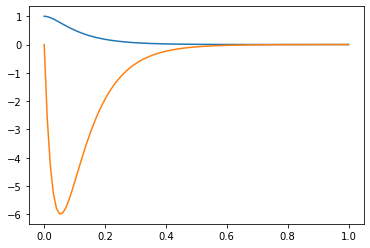

In [12]:
A = np.array([[0,1.],
              [0,0]])
B = np.array([[0.],
              [1.]])

# Tunable parameter
alpha = 1.e5
beta = 1e3
Q = np.diag([alpha,beta])
R = np.array([[1.]])

# Computes the controller based on tuned paramers
S = la.solve_continuous_are(A,B,Q,R)
# K is  the controller which would be implemented
K = -la.solve(R,B.T@S)


ACL = A + B@K

# Initial Condition
x = np.array([1.,0.])

Time = np.linspace(0,1,100)

X = []
for t in Time:
    X.append(la.expm(ACL*t)@x)
    
X = np.array(X)
plt.plot(Time,X)

This implements

$\dot x(t) = Ax(t) + Bu(t)$ where $u(t) = Kx(t)$.

In [ ]:
T